In [3]:

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
import warnings 
warnings.filterwarnings('ignore')

In [4]:
adult_1=pd.read_csv('/Users/yangzhongxuan/Library/Containers/com.microsoft.Excel/Data/Desktop/6020 Prediction/adult-all.csv')
adult=pd.read_csv('/Users/yangzhongxuan/Library/Containers/com.microsoft.Excel/Data/Desktop/6020 Prediction/adult-all.csv')

In [7]:
adult_1.shape

(48842, 15)

In [8]:
[(col, adult_1[col].nunique(), adult_1[col].dtype) for col in adult_1.columns]

[('Age ', 74, dtype('int64')),
 ('Workclass', 9, dtype('O')),
 ('fnlwgt', 28523, dtype('int64')),
 ('education', 16, dtype('O')),
 ('education-num', 16, dtype('int64')),
 ('marital-status', 7, dtype('O')),
 ('occupation', 15, dtype('O')),
 ('relationship ', 6, dtype('O')),
 ('race', 5, dtype('O')),
 ('sex', 2, dtype('O')),
 ('capital gain', 123, dtype('int64')),
 ('capital loss', 99, dtype('int64')),
 ('hours/week', 96, dtype('int64')),
 ('native country', 42, dtype('O')),
 ('salary', 2, dtype('O'))]

In [10]:
# convert frequency to high amount of unique values
adult_1['fnlwgt'].nunique()/adult_1.shape[0]*100


58.39850947954629

In [11]:
adult_1.describe()

,Age,fnlwgt,education-num,capital gain,capital loss,hours/week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
# no missing value in present, all numerical columns seems well organized  
adult_1.isna().sum()

Age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital gain      0
capital loss      0
hours/week        0
native country    0
salary            0
dtype: int64

<AxesSubplot:xlabel='Age ', ylabel='Density'>

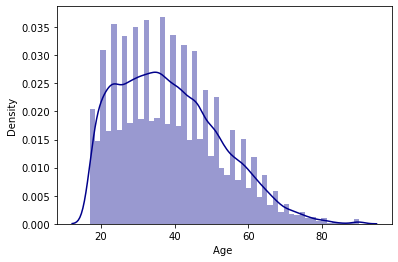

In [25]:
sns.distplot(x=adult_1['Age '], axlabel='Age ', color='darkblue')

In [21]:
adult_1.describe()

,Age,fnlwgt,education-num,capital gain,capital loss,hours/week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [29]:
# lets make groups of age in contain significant amounts of information 
print(len(adult_1[(adult_1['Age '] > 16) & (adult_1['Age '] <= 25)]))
print(len(adult_1[(adult_1['Age '] > 25) & (adult_1['Age '] <= 32)]))
print(len(adult_1[(adult_1['Age '] > 32) & (adult_1['Age '] <= 40)]))
print(len(adult_1[(adult_1['Age '] > 40) & (adult_1['Age '] <= 50)]))
print(len(adult_1[(adult_1['Age '] > 50)]))

9627
8744
10260
10403
9808


<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

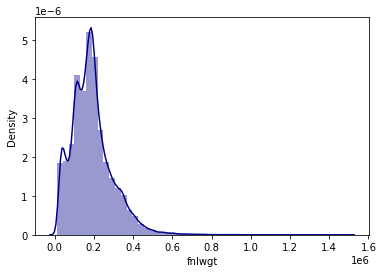

In [31]:
sns.distplot(x = adult_1['fnlwgt'], axlabel  = 'fnlwgt', color = 'darkblue')

<AxesSubplot:xlabel='Education Number', ylabel='Density'>

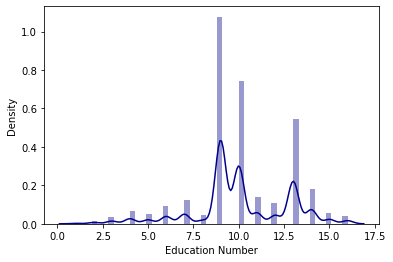

In [32]:
sns.distplot(x = adult_1['education-num'], axlabel = 'Education Number', color = 'darkblue')

<AxesSubplot:xlabel='Capital Gain', ylabel='Density'>

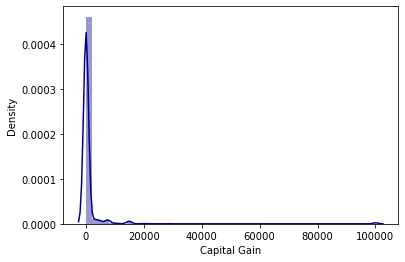

In [34]:
# Capital Gain 
sns.distplot(x = adult_1['capital gain'], axlabel = 'Capital Gain', color = 'darkblue')

<AxesSubplot:xlabel='Capital Loss', ylabel='Density'>

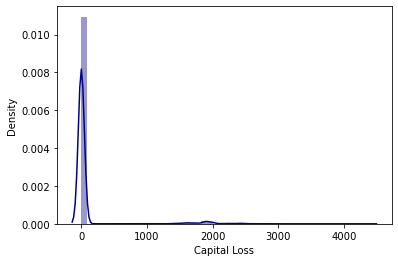

In [35]:
# Capital Loss
sns.distplot(x = adult_1['capital loss'], axlabel = 'Capital Loss', color = 'darkblue')

<AxesSubplot:xlabel='Working Hours', ylabel='Density'>

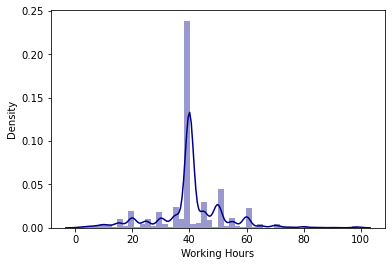

In [36]:
# working hours 
sns.distplot(x = adult_1['hours/week'], axlabel = 'Working Hours', color = 'darkblue')

In [21]:
categorical_var = [col for col in adult_1.columns if adult_1[col].dtype == object]
numerical_var = [col for col in adult_1.columns if adult_1[col].dtype != object]
print(numerical_var)
print(categorical_var)

['Age ', 'fnlwgt', 'education-num', 'capital gain', 'capital loss', 'hours/week']
['Workclass', 'education', 'marital-status', 'occupation', 'relationship ', 'race', 'sex', 'native country', 'salary']


In [40]:
# Categorical Variables EDA 
adult_1['salary'] = adult_1['salary'].apply(lambda x:x.replace('<=50K', '0'))
adult_1['salary'] = adult_1['salary'].apply(lambda x:x.replace('>50K', '1'))
adult_1['salary'] = adult_1['salary'].astype(int)

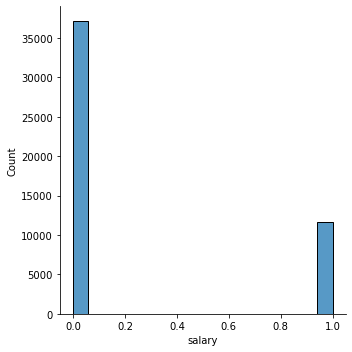

In [41]:
sns.displot(x = adult_1['salary'])

In [42]:
categorical_var

['Workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship ',
 'race',
 'sex',
 'native country',
 'salary']

In [43]:
[(i, adult_1[i].unique()) for i in categorical_var]

[('Workclass',
  array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
         'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
        dtype=object)),
 ('education',
  array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
         'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
         '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)),
 ('marital-status',
  array(['Never-married', 'Married-civ-spouse', 'Divorced',
         'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
         'Widowed'], dtype=object)),
 ('occupation',
  array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
         'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
         'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
         'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
         'Priv-house-serv'], dtype=object)),
 ('relationship ',
  array(['Not-in-family', 'Husband', 'Wife'

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'State-gov'),
  Text(1, 0, 'Self-emp-not-inc'),
  Text(2, 0, 'Private'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'Local-gov'),
  Text(5, 0, '?'),
  Text(6, 0, 'Self-emp-inc'),
  Text(7, 0, 'Without-pay'),
  Text(8, 0, 'Never-worked')])

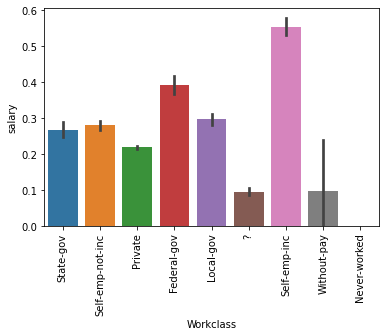

In [59]:
# Workclass
sns.barplot(x = 'Workclass', y = 'salary', data = adult_1)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, '11th'),
  Text(3, 0, 'Masters'),
  Text(4, 0, '9th'),
  Text(5, 0, 'Some-college'),
  Text(6, 0, 'Assoc-acdm'),
  Text(7, 0, 'Assoc-voc'),
  Text(8, 0, '7th-8th'),
  Text(9, 0, 'Doctorate'),
  Text(10, 0, 'Prof-school'),
  Text(11, 0, '5th-6th'),
  Text(12, 0, '10th'),
  Text(13, 0, '1st-4th'),
  Text(14, 0, 'Preschool'),
  Text(15, 0, '12th')])

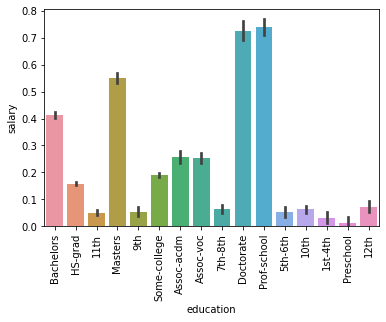

In [46]:
# Education
sns.barplot(x = adult_1['education'], y = adult_1['salary'])
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Never-married'),
  Text(1, 0, 'Married-civ-spouse'),
  Text(2, 0, 'Divorced'),
  Text(3, 0, 'Married-spouse-absent'),
  Text(4, 0, 'Separated'),
  Text(5, 0, 'Married-AF-spouse'),
  Text(6, 0, 'Widowed')])

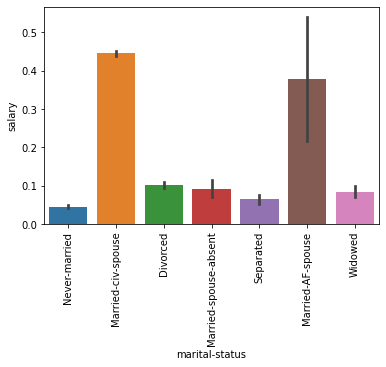

In [61]:
# Marital Status
sns.barplot(x = 'marital-status', y = 'salary', data = adult_1)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Never-married'),
  Text(1, 0, 'Married-civ-spouse'),
  Text(2, 0, 'Divorced'),
  Text(3, 0, 'Married-spouse-absent'),
  Text(4, 0, 'Separated'),
  Text(5, 0, 'Married-AF-spouse'),
  Text(6, 0, 'Widowed')])

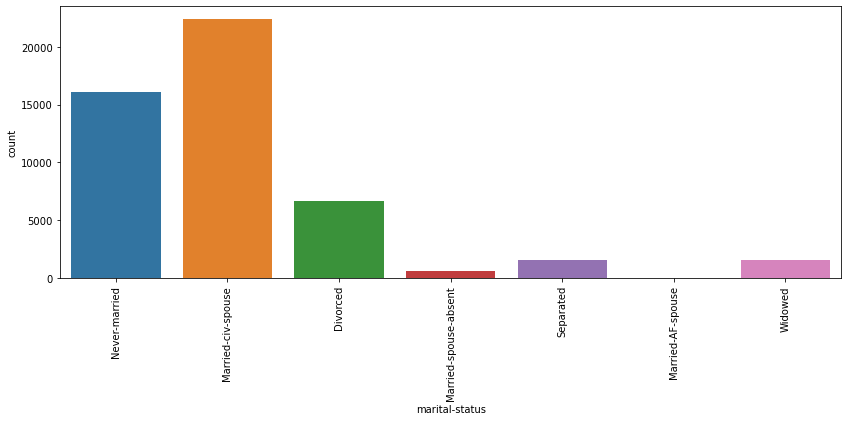

In [62]:
plt.figure(figsize = (14,5))

sns.countplot(x = 'marital-status', data = adult_1);
plt.xticks(rotation = 90)

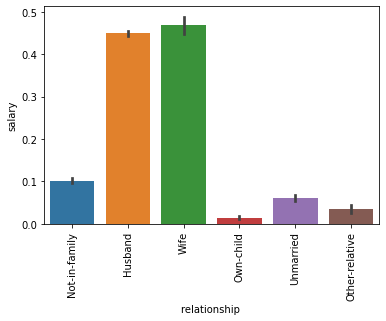

In [64]:
sns.barplot(x = 'relationship ', y = 'salary', data = adult_1)
plt.xticks(rotation = 90);

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Not-in-family'),
  Text(1, 0, 'Husband'),
  Text(2, 0, 'Wife'),
  Text(3, 0, 'Own-child'),
  Text(4, 0, 'Unmarried'),
  Text(5, 0, 'Other-relative')])

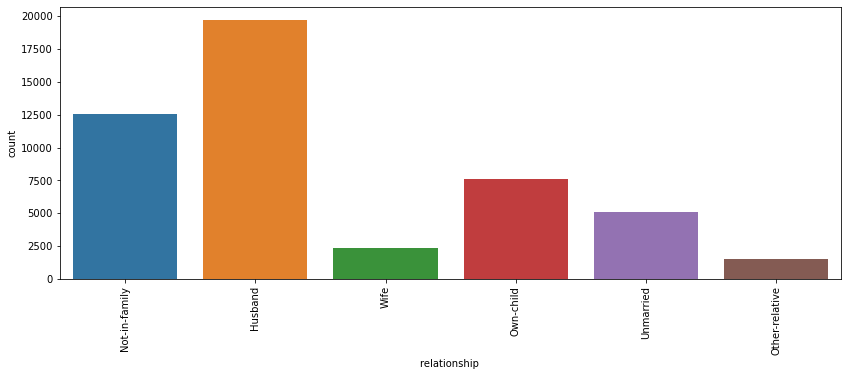

In [66]:
plt.figure(figsize = (14,5))

sns.countplot(x = 'relationship ', data = adult_1);
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Adm-clerical'),
  Text(1, 0, 'Exec-managerial'),
  Text(2, 0, 'Handlers-cleaners'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Craft-repair'),
  Text(7, 0, 'Transport-moving'),
  Text(8, 0, 'Farming-fishing'),
  Text(9, 0, 'Machine-op-inspct'),
  Text(10, 0, 'Tech-support'),
  Text(11, 0, '?'),
  Text(12, 0, 'Protective-serv'),
  Text(13, 0, 'Armed-Forces'),
  Text(14, 0, 'Priv-house-serv')])

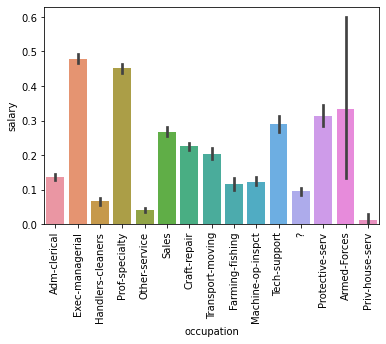

In [67]:
sns.barplot(x = 'occupation', y = 'salary', data = adult_1)
plt.xticks(rotation = 90)

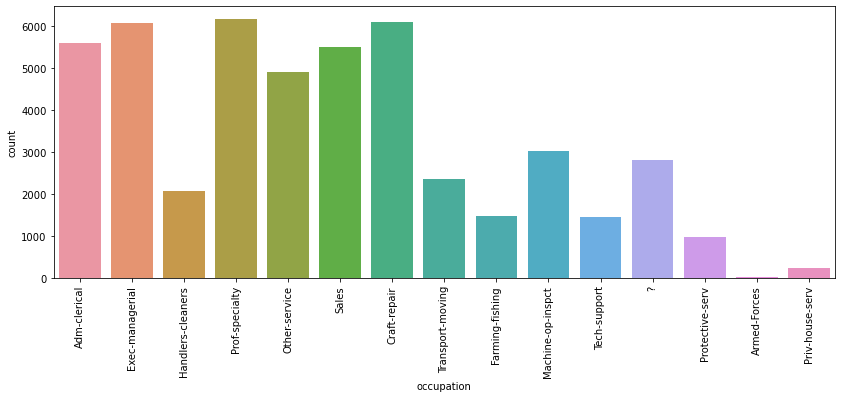

In [69]:
# Occupation 
plt.figure(figsize = (14,5))

sns.countplot(x = 'occupation', data = adult_1);
plt.xticks(rotation = 90);

<AxesSubplot:xlabel='sex', ylabel='salary'>

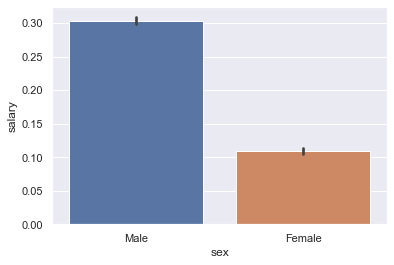

In [70]:
# Sex 
sns.set(style = 'darkgrid', font_scale = 1)
sns.barplot(x = 'sex', y = 'salary', data = adult_1)

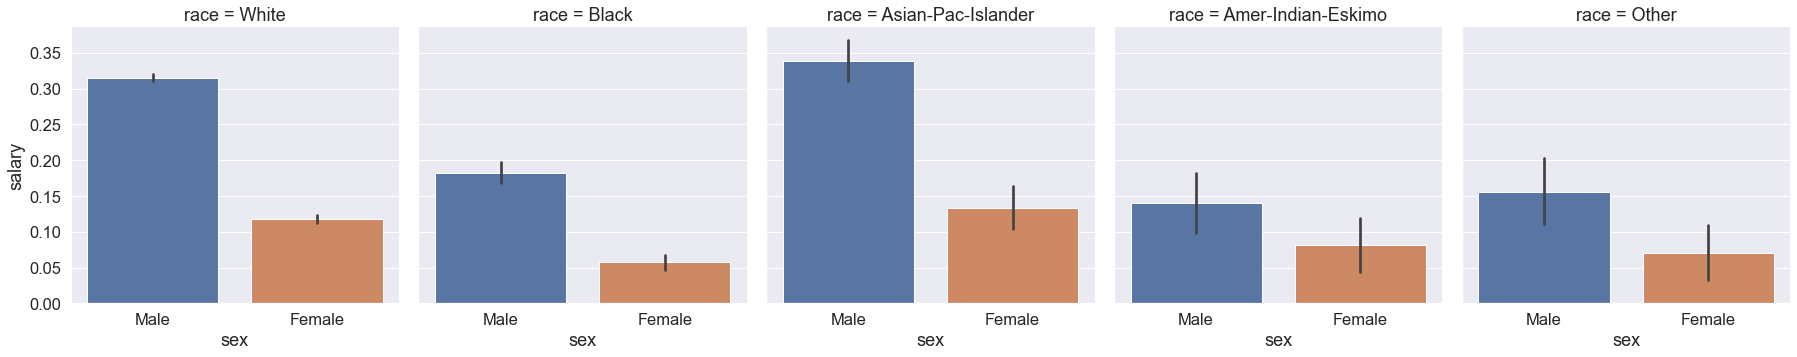

In [72]:
sns.set(style = 'darkgrid', font_scale = 1.5)
sns.catplot(x = 'sex', y = 'salary', data = adult_1, kind = 'bar', col = 'race', height = 5, aspect = 1)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Asian-Pac-Islander'),
  Text(3, 0, 'Amer-Indian-Eskimo'),
  Text(4, 0, 'Other')])

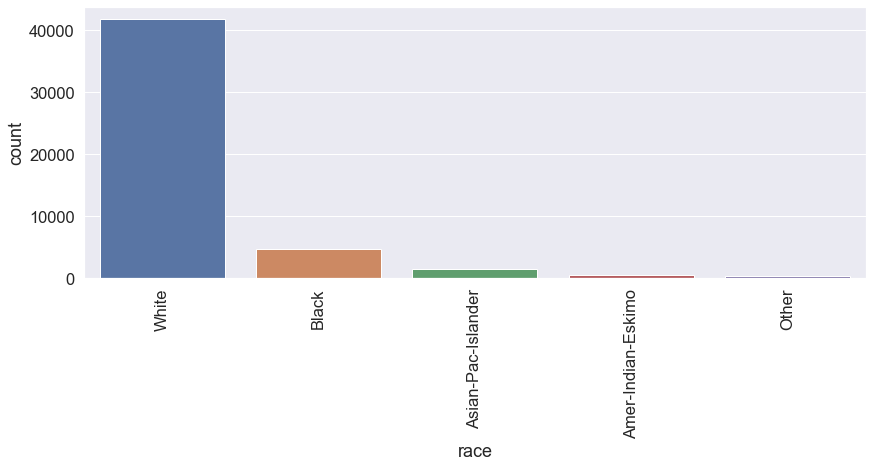

In [73]:
plt.figure(figsize = (14, 5))

sns.countplot(x = 'race', data = adult_1);
plt.xticks(rotation = 90)

In [74]:
adult_1['race'] = adult_1['race'].apply(lambda x: 'Other' if x != 'White' else x)

Text(0.5, 1.0, 'Country_wise_income')

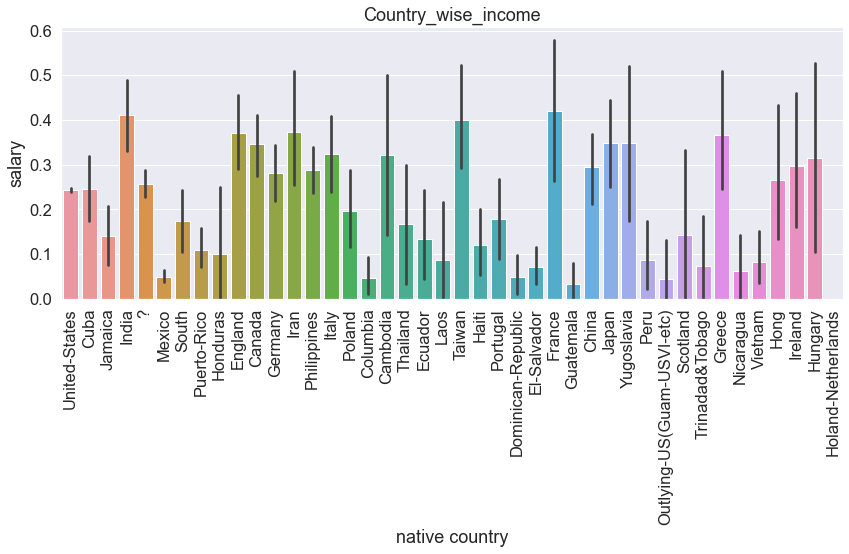

In [75]:
# Native Country
sns.set(style = 'darkgrid', font_scale = 1.5)
plt.figure(figsize = (14, 5))
sns.barplot(x = 'native country', y = 'salary', data = adult_1)
plt.xticks(rotation = 90);
plt.title('Country_wise_income')

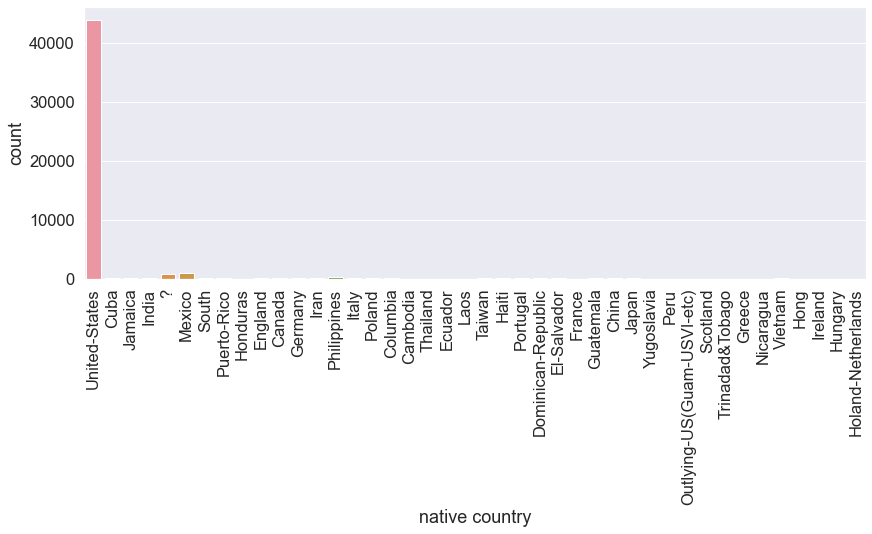

In [76]:
plt.figure(figsize = (14,5))

sns.countplot(x = 'native country', data = adult_1);
plt.xticks(rotation = 90);

In [78]:
# Age 
for i in adult_1:
    adult_1.loc[(adult_1['Age '] > 16) & (adult_1['Age '] <= 25), 'age'] = 1
    adult_1.loc[(adult_1['Age '] > 25) & (adult_1['Age '] <= 32), 'age'] = 2
    adult_1.loc[(adult_1['Age '] > 32) & (adult_1['Age '] <= 40), 'age'] = 3
    adult_1.loc[(adult_1['Age '] > 40) & (adult_1['Age '] <= 50), 'age'] = 4
    adult_1.loc[(adult_1['Age '] > 50), 'age'] = 5

In [167]:
adult_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48841 entries, 0 to 48840
Empty DataFrame

In [45]:
#np.random.seed(42)
indices = np.random.permutation(len(adult_data))
n_training_samples = 12
trainset_data = adult_data[indices[:-n_training_samples]]
trainset_labels = adult_labels[indices[:-n_training_samples]]
testset_data = adult_data[indices[-n_training_samples:]]
testset_labels = adult_labels[indices[-n_training_samples:]]

In [59]:
adult_1.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


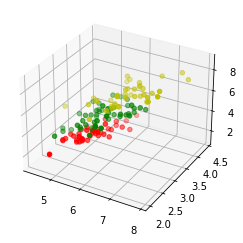

In [228]:
X = []
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(trainset_data)):
        if trainset_labels[i] == iclass:
            X[iclass][0].append(trainset_data[i][0])
            X[iclass][1].append(trainset_data[i][1])
            X[iclass][2].append(sum(trainset_data[i][2:]))

colours = ('r', 'g', 'y')

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for iclass in range(3):
    ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c = colours[iclass])
    
plt.show()

In [238]:
def distance(instance1, instance2):
    
    instance1 = np.array(instance1)
    instance2 = np.array(instance2)
    
    return np.linalg.norm(instance1 - instance2)

In [239]:
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

In [240]:
def get_neighbors(training_set,
                 labels,
                 test_instance,
                 k,
                 distance=distance):
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return(neighbors)

In [241]:
for i in range(n_training_samples):
    neighbors = get_neighbors(trainset_data,
                             trainset_labels,
                             testset_data[i],
                             3,
                             distance = distance)
    print('index: ', i, 
         ', result of vote: ', vote(neighbors),
         ', label: ', testset_labels[i],
         ', data: ', testset_data[i])

index:  0 , result of vote:  0 , label:  0 , data:  [5.1 3.7 1.5 0.4]
index:  1 , result of vote:  2 , label:  2 , data:  [7.7 2.6 6.9 2.3]
index:  2 , result of vote:  2 , label:  2 , data:  [5.8 2.8 5.1 2.4]
index:  3 , result of vote:  2 , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  4 , result of vote:  2 , label:  2 , data:  [6.7 3.  5.2 2.3]
index:  5 , result of vote:  2 , label:  2 , data:  [6.1 2.6 5.6 1.4]
index:  6 , result of vote:  2 , label:  2 , data:  [7.7 3.  6.1 2.3]
index:  7 , result of vote:  2 , label:  2 , data:  [6.1 3.  4.9 1.8]
index:  8 , result of vote:  0 , label:  0 , data:  [4.6 3.2 1.4 0.2]
index:  9 , result of vote:  0 , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  10 , result of vote:  2 , label:  2 , data:  [6.9 3.1 5.1 2.3]
index:  11 , result of vote:  0 , label:  0 , data:  [5.2 4.1 1.5 0.1]


In [225]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
# The target variable is 'quality'.
#Y = adult_1['39']
#X =  adult_1[['State-gov', 'Bachelors', 'Never-married', 'Male']]
# Split the data into train and test data:
trainset_data, testset_data, trainset_labels, testset_labels = train_test_split(trainset_data, testset_data, test_size = 0.2)


ValueError: Found input variables with inconsistent numbers of samples: [138, 12]

In [199]:


import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/yangzhongxuan/Library/Containers/com.microsoft.Excel/Data/Desktop/6020 Prediction/adult-all (1).csv') # ,sep=';')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [200]:
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48837,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


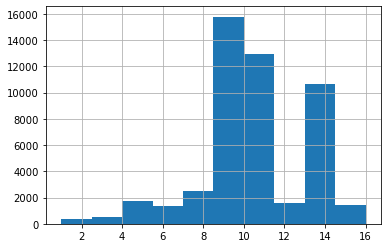

In [206]:
df.columns
df['13'] = df['13'].astype(int)
df.head()
df['13'].hist()

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor


<AxesSubplot:>

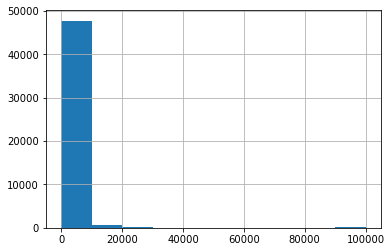

In [120]:
df.columns
df['2174'] = df['2174'].astype(int)
df.head()
df['2174'].hist()


<AxesSubplot:>

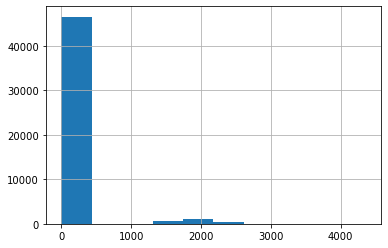

In [127]:
df.columns
df['0'] = df['0'].astype(int)
df.head()
df['0'].hist()


<AxesSubplot:>

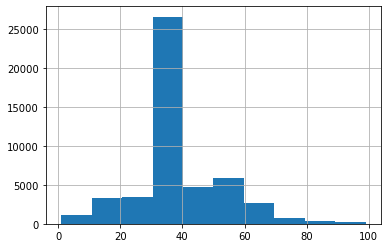

In [128]:
df.columns
df['40'] = df['40'].astype(int)
df.head()
df['40'].hist()


In [210]:
from sklearn.model_selection import train_test_split
x_train, x_test, z_train, z_test = train_test_split(x, z, test_size=0.20)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, z_train)

NameError: name 'x' is not defined

In [211]:
z_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(z_test, z_pred))
print(classification_report(z_test, z_pred))

NameError: name 'x_test' is not defined

In [223]:
adult
x = adult[tuple['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40', 'United-States', '<=50K']]
z = adult[['State-gov']]
z

TypeError: 'type' object is not subscriptable